# Lab Exercise 1 
## Predicting House prices
### Submitted by: Nigel Haim N. Sebastian

#### Importing 
- When Imported pandas it prompts me that "Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0)"

In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Loading and checking the dataset 

In [407]:
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**This concludes that there are no null values in the dataset**

In [409]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### Data Analysis

<BarContainer object of 6 artists>

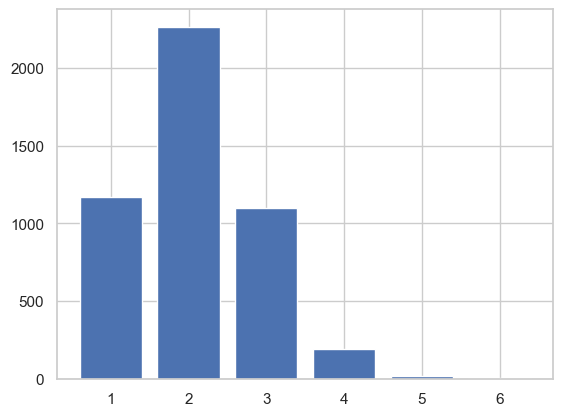

In [410]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

<Axes: xlabel='BHK', ylabel='Rent'>

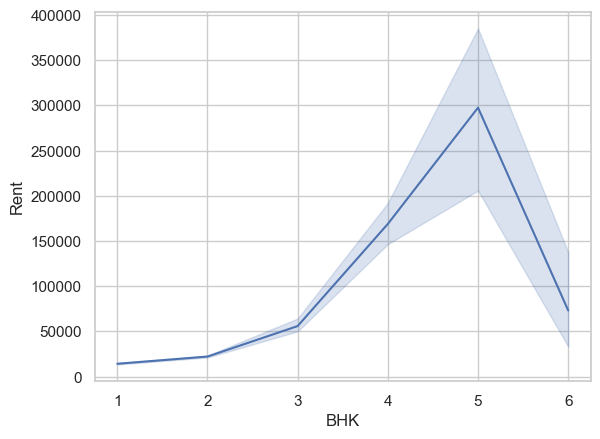

In [411]:
sns.lineplot(x=data['BHK'], y=data['Rent'], data=data)

<Axes: xlabel='Posted On', ylabel='Rent'>

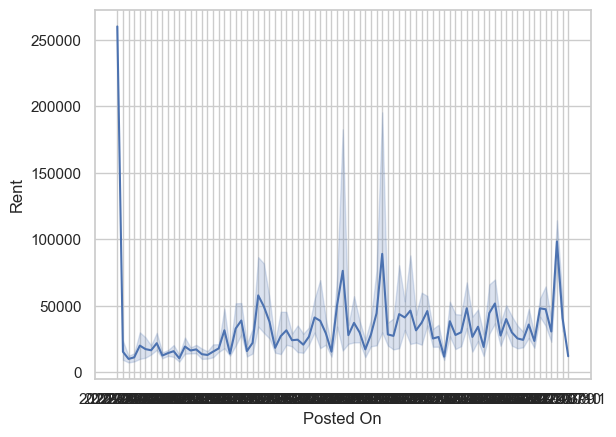

In [412]:
sorted_date = data.sort_values(by='Posted On') 
sns.set_theme(style="whitegrid")
sns.lineplot(x=sorted_date['Posted On'], y=sorted_date['Rent'], data=data)

<BarContainer object of 4746 artists>

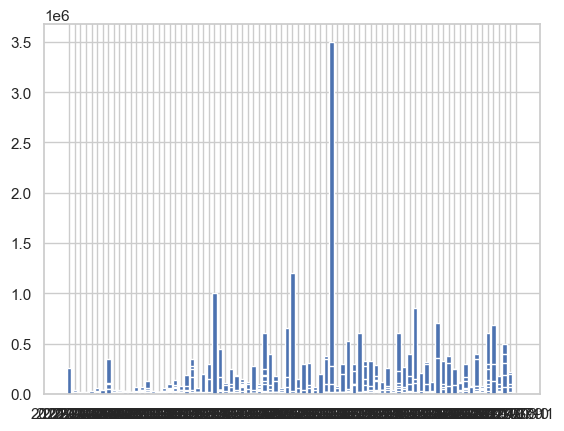

In [413]:
plt.bar(sorted_date['Posted On'], sorted_date['Rent'])

In [414]:
def one_hot_encode(data, column):
 encoded = pd.get_dummies(data[column], drop_first= True)
 data = data.drop(column, axis = 1)
 data = data.join(encoded)
 return data

### Adding values of Area Type and City

In [415]:
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Rent', 'Area Type', 'City', 'Size']]
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
# data = one_hot_encode(data, 'Tenant Preferred')
data

,BHK,Bathroom,Rent,Size,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,2,10000,1100,False,True,False,True,False,False,False,True,False
1,2,1,20000,800,True,False,False,True,False,False,False,True,False
2,2,1,17000,1000,True,False,False,True,False,False,False,True,False
3,2,1,10000,800,False,True,False,True,False,False,False,True,False
4,2,1,7500,850,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,15000,1000,True,False,True,False,False,False,True,False,False
4742,3,3,29000,2000,True,False,False,True,False,False,True,False,False
4743,3,3,35000,1750,True,False,True,False,False,False,True,False,False
4744,3,2,45000,1500,True,False,True,False,False,False,True,False,False


- Tenant Prefered is an error since the string has a /
- I also need to fix the floor

### Training and Test Spill

In [416]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardize

In [418]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modeling 

In [419]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 2757.93600027, 10391.13038068, 24062.81063709, -4251.56852697,
       -3866.95994761, -2475.54788004, -5409.08696446, -3450.2332061 ,
        3154.86981321, -6845.42457814,  -927.99808598, 21257.51605301])

### Quantitative Evaluation

In [420]:
y_preds = model.predict(X_test)

#### The coefficients

In [421]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 2757.93600027 10391.13038068 24062.81063709 -4251.56852697
 -3866.95994761 -2475.54788004 -5409.08696446 -3450.2332061
  3154.86981321 -6845.42457814  -927.99808598 21257.51605301]


#### The mean squared error

In [422]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 1905735826.05


In [423]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.52


### Graph of the predicted and actual values

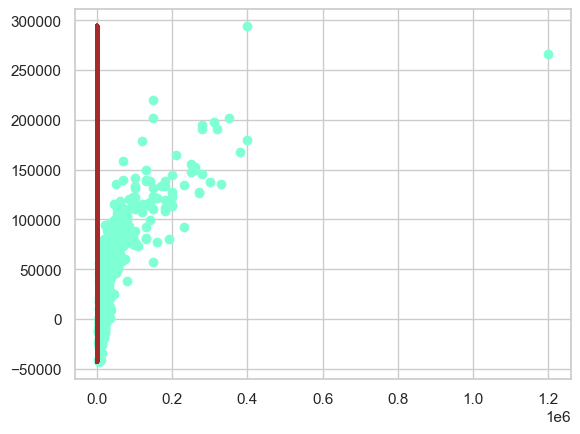

In [424]:
plt.scatter(y_test, y_preds, color='aquamarine', )
plt.plot(X_test, y_preds, color='brown', linewidth=3)